In [1]:
%matplotlib inline

In [2]:
import os
import csv
import sys
import shutil
from collections import namedtuple
from os import environ, listdir, makedirs
from os.path import dirname, exists, expanduser, isdir, join, splitext
import hashlib
from sklearn import datasets
import numpy as np
from sklearn.utils import Bunch
from sklearn.utils import check_random_state
from sklearn.externals.six.moves.urllib.request import urlretrieve

def load_data(module_path, data_file_name, samples, features):
    """Loads data from module_path/data/data_file_name.
    Parameters
    ----------
    data_file_name : String. Name of csv file to be loaded from
    module_path/data/data_file_name. For example 'wine_data.csv'.
    Returns
    -------
    data : Numpy Array
        A 2D array with each row representing one sample and each column
        representing the features of a given sample.
    target : Numpy Array
        A 1D array holding target variables for all the samples in `data.
        For example target[0] is the target varible for data[0].
    target_names : Numpy Array
        A 1D array containing the names of the classifications. For example
        target_names[0] is the name of the target[0] class.
        
        AI Driver = 0
Joe = 1
Gerald = 2
controller = 3
sandro = 4
Test2 = 5
Test = 6
Kev = 7
        
    """
    with open(join(module_path, data_file_name)) as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = samples
        n_features = features
        target_names = np.array(temp[2:])
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples,), dtype=np.int)

        for i, ir in enumerate(data_file):
           
           if(ir[:-1][0] != 'null'):
                data[i] = np.asarray(ir[:-1], dtype=np.float64)
                target[i] = np.asarray(ir[-1], dtype=np.int)

    return data, target, target_names


In [3]:

def load_AnkiTelemetry(return_X_y=False):
    #module_path = dirname(__file__)
    data, target, target_names = load_data('C:\\Users\\d047102\\Desktop\\TelemetryAnomalyDH', 'AnkiTelemetry.csv',10001,7)

    #with open(join(module_path, 'descr', 'iris.rst')) as rst_file:
    #    fdescr = rst_file.read()

    if return_X_y:
        return data, target

    return Bunch(data=data, target=target,
                 target_names=target_names,
                 DESCR=0,
                 feature_names=['sepal length (cm)', 'sepal width (cm)',
                                'petal length (cm)', 'petal width (cm)'])

In [4]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

telemetry = load_AnkiTelemetry()
speed = telemetry.data[:, 1] # speed

stats.describe(speed)



DescribeResult(nobs=10001, minmax=(0.0, 1369.0), mean=446.74682531746828, variance=16702.459896170385, skewness=2.413408283964585, kurtosis=8.152573382140028)

In [5]:


battery = telemetry.data[:, 4] # battery

stats.describe(battery)

DescribeResult(nobs=10001, minmax=(0.0, 4259.0), mean=3941.7895210478951, variance=64525.746194180581, skewness=-10.198937193712375, kurtosis=153.92113689495488)

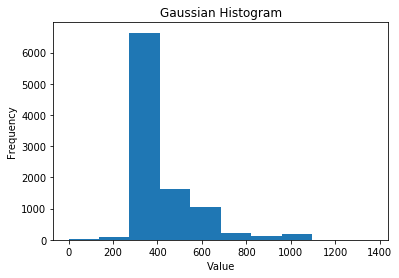

In [6]:

plt.hist(speed)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

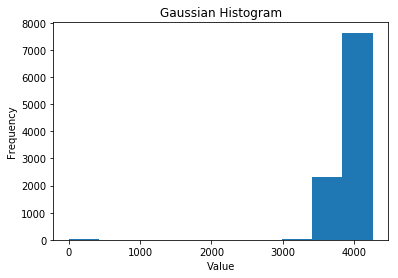

In [7]:
plt.hist(battery)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

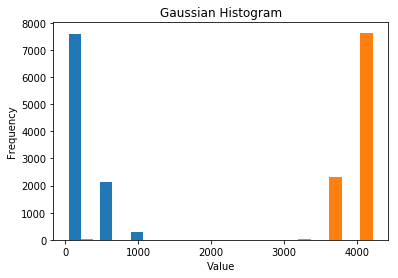

In [8]:

speed_new = np.stack((speed, battery), axis=-1)

speed_battery = speed_new
speed_battery.shape

stats.describe(speed_battery)

plt.hist(speed_battery)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

In [ ]:
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
stats.describe(X_train)


In [ ]:

norm2 = normalize(X_train, axis=0).ravel()

stats.describe(norm2)


In [ ]:

x_normed = (X_train - X_train.min(0)) / X_train.ptp(0)
stats.describe(x_normed)

In [ ]:

def f(x):
    return x * x + 300 * x - 2 if x > 0 else x * 500 + 8

f = np.vectorize(f)  # or use a different name if you want to keep the original f

speed_battery_outliers = speed_battery[8001:8100]  # if A is your Numpy array
stats.describe(speed_battery_outliers)

C:\Users\d047102\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


ValueError: Contour levels must be increasing

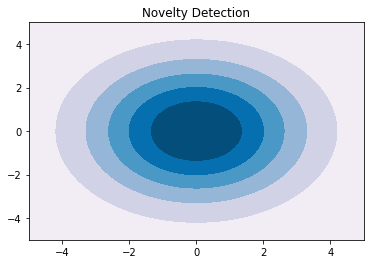

In [9]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
from sklearn.preprocessing import normalize

xx, yy = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))


telemetry = load_AnkiTelemetry()
speed = telemetry.data[:, 1] # speed
battery = telemetry.data[:, 4] # battery
speed_battery = np.stack((speed, battery), axis=-1)

speed_battery = (speed_battery - speed_battery.min(0)) # / speed_battery.ptp(0) # normalization

# Generate train data
#X = 0.3 * np.random.randn(100, 2)
#X_train = np.r_[X + 2, X - 2]
X_train = speed_battery[:2000]

# Generate some regular novel observations
#X = 0.3 * np.random.randn(20, 2)
#X_test = np.r_[X + 2, X - 2]
X_test = speed_battery[2001:2500]
# Generate some abnormal novel observations
#X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
 

def f(x):
    return x * x + 3 * x - 2 if x > 0 else x * 5 + 8

f = np.vectorize(f)  # or use a different name if you want to keep the original f

X_outliers = f(speed_battery[2501:3000])  # if A is your Numpy array
X_outliers = (X_outliers - X_outliers.min(0)) / X_outliers.ptp(0) # normalization

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-1, 500))
plt.ylim((-2, 500))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


# import some data to play with
iris = load_AnkiTelemetry()
X = iris.data[:, 1:3]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Offset')
plt.ylabel('Speed')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = load_AnkiTelemetry()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()